In [2]:
import pandas as pd

In [7]:
data = pd.read_csv('Data/merged_df_with_sentiment.csv')

In [10]:
# drop the first column
data = data.drop(data.columns[0], axis=1)
data.head()

,Title,URL,Article_Text,Publication Date,Source,Sentiment Score
0,Bank of England governor says don't underestim...,https://www.bbc.co.uk/news/business-67474899,Andrew Bailey told MPs that Bank policymakers ...,2023-11-21,BBC,0.249234
1,Rishi Sunak: 'We've halved inflation' and othe...,https://www.bbc.co.uk/news/uk-politics-67475281,We've been looking at some of his claims. Rish...,2023-11-20,BBC,0.150736
2,Rachel Reeves: Labour would increase benefits ...,https://www.bbc.co.uk/news/uk-politics-67466971,"But before the champagne corks pop, everyone s...",2023-11-16,BBC,0.209527
3,What a falling inflation rate means for your f...,https://www.bbc.co.uk/news/business-67426526,When inflation started to accelerate early in ...,2023-11-15,BBC,0.396906
4,Why inflation is falling but prices are still ...,https://www.bbc.co.uk/news/business-64290160,The government had committed to better protect...,2023-11-15,BBC,0.250206


In [14]:
# count number of bbc articles
bbc_count = data[data['Source'] == 'BBC'].shape[0]
print(f"Number of BBC articles: {bbc_count}")
# count number of guardian articles
guardian_count = data[data['Source'] == 'Guardian'].shape[0]
print(f"Number of Guardian articles: {guardian_count}")
# count number of telegraph articles
telegraph_count = data[data['Source'] == 'Telegraph'].shape[0]
print(f"Number of Telegraph articles: {telegraph_count}")


Number of BBC articles: 233
Number of Guardian articles: 1618
Number of Telegraph articles: 1759


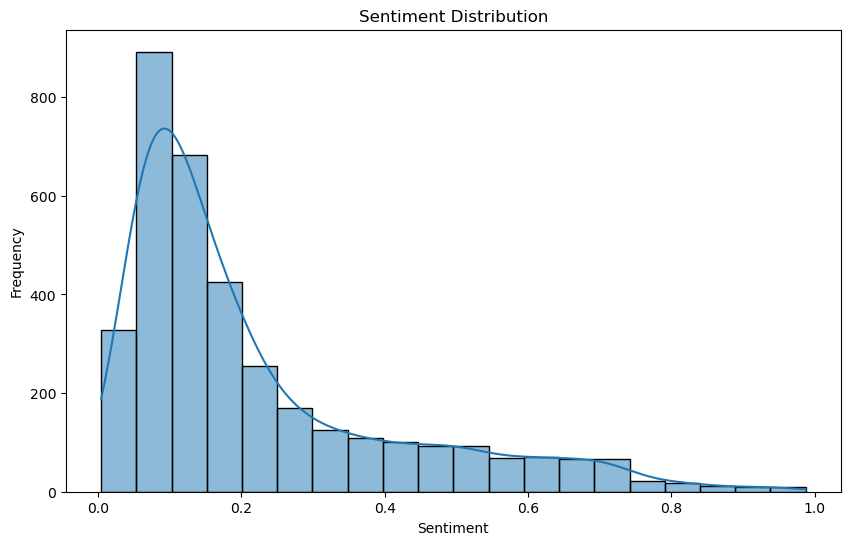

In [38]:
# plot sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment Score'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()
